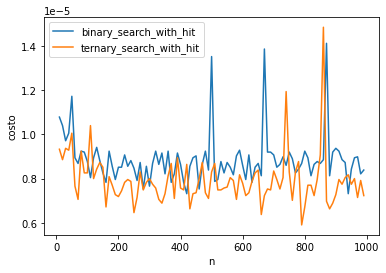

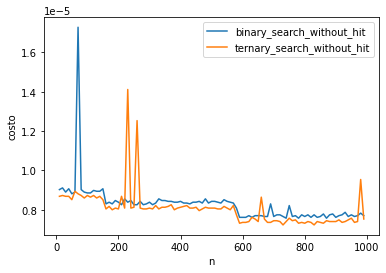

In [4]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

n_min = 10
n_max = 1000
st = 10
iterations = 10
elem_to_search = 100

def prepare_elem_list(elem_to_search, max_amount, with_hit):
    els = random.sample(range(1,100), max_amount)
    if with_hit:
        els.append(elem_to_search)
        els = list(set(els))
    return els
        

                
def binary_search(nums):
    binary_search_func(nums, 0, len(nums)-1, elem_to_search) 
            

def binary_search_func(arr, l, r, elem_to_search): 
  
    # Check base case 
    if r >= l: 
  
        mid = l + (r - l) // 2
  
        # If element is present at the middle itself 
        if arr[mid] == elem_to_search: 
            return mid 
          
        # If element is smaller than mid, then it  
        # can only be present in left subarray 
        elif arr[mid] > elem_to_search: 
            return binary_search_func(arr, l, mid-1, elem_to_search) 
  
        # Else the element can only be present  
        # in right subarray 
        else: 
            return binary_search_func(arr, mid + 1, r, elem_to_search) 
  
    else: 
        # Element is not present in the array 
        return -1

    
# recursive approach to ternary search 
import math as mt 

def ternary_search(array):
    ternary_search_func(0, len(array) -1 , elem_to_search, array) 

# Function to perform Ternary Search 
def ternary_search_func(l, r, key, ar): 

    if (r >= l): 

        # Find the mid1 and mid2 
        mid1 = l + (r - l) //3
        mid2 = r - (r - l) //3

        # Check if key is present at any mid 
        if (ar[mid1] == key): 
            return mid1 

        if (ar[mid2] == key): 
            return mid2 

        # Since key is not present at mid, 
        # check in which region it is present 
        # then repeat the Search operation 
        # in that region 
        if (key < ar[mid1]): 

        # The key lies in between l and mid1 
            return ternary_search_func(l, mid1 - 1, key, ar) 

        elif (key > ar[mid2]): 

            # The key lies in between mid2 and r 
            return ternary_search_func(mid2 + 1, r, key, ar) 

        else: 

            # The key lies in between mid1 and mid2 
            return ternary_search_func(mid1 + 1, mid2 - 1, key, ar) 

    # Key not found 
    return -1    
    
def apply_func(n_min, n_max, st, funcs_to_apply, with_hit=True):
    res_one = list()
    res_two = list()
    for n in range(n_min, n_max, st):
        suma_one = 0
        suma_two = 0
        for index_of_range in range(1, iterations):
            list_of_values = prepare_elem_list(elem_to_search, index_of_range, with_hit)
            suma_one += timeit.timeit(lambda : funcs_to_apply[0](list_of_values) , number = 1)
            suma_two += timeit.timeit(lambda : funcs_to_apply[1](list_of_values) , number = 1)
        promedio_one = suma_one / iterations
        promedio_two = suma_two / iterations
        res_one.append(promedio_one)
        res_two.append(promedio_two)
    return res_one, res_two

binary_elem_hit , ternary_elem_hit = apply_func(n_min, n_max, st, [binary_search, ternary_search])
binary_elem_no_hit , ternary_elem_no_hit = apply_func(n_min, n_max, st, [binary_search, ternary_search], False)

def plot_elems(functions_to_apply_dict, figure_elem):
    eje_x = list(range(n_min, n_max, st))
    plt.figure(figure_elem)
    for (key, value) in functions_to_apply_dict.items():
        plt.plot(eje_x, value, label = key)
    plt.xlabel('n')
    plt.ylabel('costo')
    plt.legend()
    
# Analisis de BS Y Ternary search con elementos aleatorios (siempre hay un hit , vease obtengo el elemento)
plot_elems({'binary_search_with_hit' : binary_elem_hit, 'ternary_search_with_hit': ternary_elem_hit},1)



#Analisis de BS y Ternary search con elementos aleatorios (sin hit )
plot_elems({'binary_search_without_hit' : binary_elem_no_hit, 'ternary_search_without_hit' : ternary_elem_no_hit}, 2)
    



